In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import kagglehub
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

Using Colab cache for faster access to the 'churn-modelling' dataset.


In [ ]:
df = pd.read_csv(f"{path}/Churn_Modelling.csv")

In [ ]:
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [ ]:
print(df.shape)

(10000, 14)


In [ ]:
print(df.info)

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first = True)

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [ ]:
features = ['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_Spain', 'Geography_Germany']
X = df[features]
y = df['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 86.95

Confusion Matrix:
 [[1552   55]
 [ 206  187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



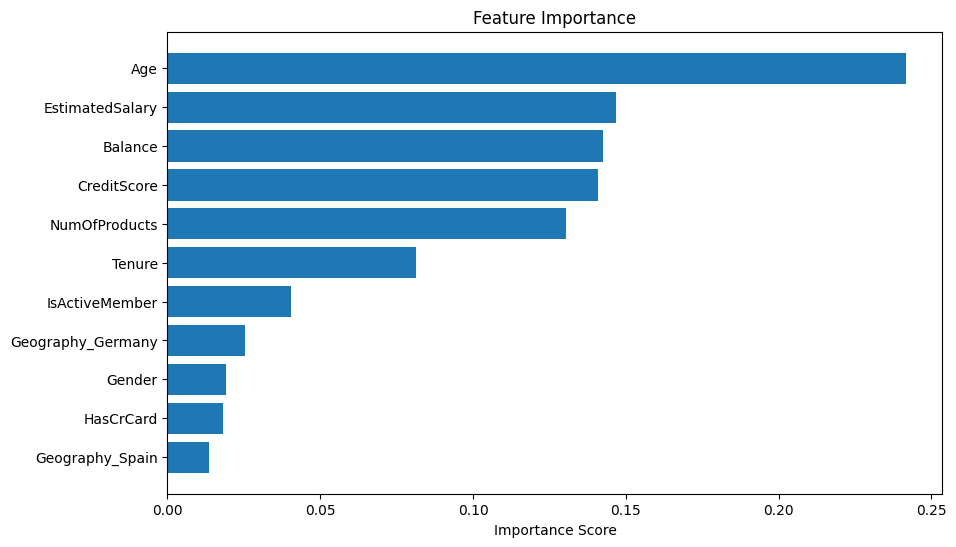

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), names)
plt.xlabel("Importance Score")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 81.10000000000001

Confusion Matrix:
 [[1543   64]
 [ 314   79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 85.6

Confusion Matrix:
 [[1562   45]
 [ 243  150]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.38      0.51       393

    accuracy                           0.86      2000
   macro avg       0.82      0.68      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 83.0

Confusion Matrix:
 [[1514   93]
 [ 247  146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 86.75

Confusion Matrix:
 [[1543   64]
 [ 201  192]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [ ]:
#feature engineering

df = pd.read_csv(f"{path}/Churn_Modelling.csv")

# Binary feature for Balance
df['BalanceZero'] = (df['Balance'] == 0).astype(int)

# Age grouping
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])

# Balance to Salary Ratio
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
#Absolute balance alone can be misleading, Ratio gives context


# Interaction feature between NumOfProducts and IsActiveMember
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']
#combines 2 features 2gether

# Tenure grouping
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[-1, 2, 5, 7, 10], labels=['0-2', '3-5', '6-7', '8-10'])
#Groups customers based on how long they’ve been with the bank

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first = True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [ ]:
cols_to_encode = [col for col in ['AgeGroup', 'TenureGroup'] if col in df.columns]
if cols_to_encode:
    df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

features = ['CreditScore', 'Age', 'HasCrCard', 'Tenure', 'Balance', 'NumOfProducts', 'IsActiveMember',
            'EstimatedSalary', 'Geography_Germany', 'Geography_Spain', 'BalanceZero', 'BalanceToSalaryRatio', 'ProductUsage',
            'Male_Germany', 'Male_Spain'] + [col for col in df.columns if 'AgeGroup_' in col or 'TenureGroup_' in col]

In [ ]:
X = df[features]
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("New Accuracy Score:", accuracy_score(y_test, y_pred) * 100)
print("\nNew Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nNew Classification Report:\n", classification_report(y_test, y_pred))


New Accuracy Score: 86.6

New Confusion Matrix:
 [[1546   61]
 [ 207  186]]

New Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



**OLD RANDOM FOREST RESULTS**

Accuracy Score: 86.95

Confusion Matrix:
 [[1552   55]
 [ 206  187]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



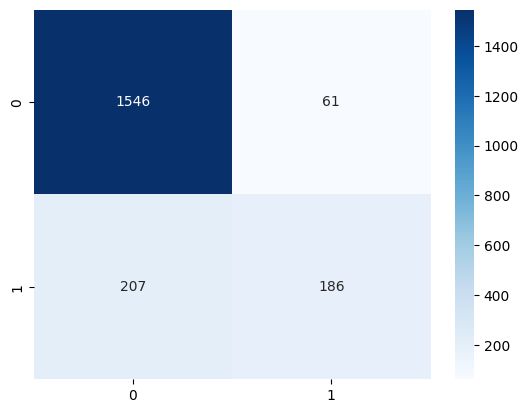

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("CV Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

CV Scores: [0.8615 0.871  0.856  0.864  0.8595]
Mean CV Score: 0.8623999999999998
